<a href="https://colab.research.google.com/github/sean-otoole/HODD/blob/main/prepare_training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy anndata umap-learn python-igraph louvain h5py leidenalg > /dev/null 2>&1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Success

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/HODD/Kamath_et_al_2022")

In [4]:
import scanpy as sc
import pandas as pd
from scipy.io import mmread
import scipy.sparse

# File paths
meta_path = "METADATA_PD.tsv.gz"
matrix_path = "GSE178265_Homo_matrix.mtx.gz"
barcodes_path = "GSE178265_Homo_bcd.tsv.gz"
features_path = "Homo_features.tsv"

# Load sparse count matrix
X = mmread(matrix_path).tocsc()  # Convert to Compressed Sparse Column format for efficiency

# Load barcodes (cell IDs)
barcodes = pd.read_csv(barcodes_path, header=None, sep="\t")[0].values  # Read as a NumPy array

# Load gene names/features
genes = pd.read_csv(features_path, header=None, sep="\t")[0].values  # Read as a NumPy array

# Create AnnData object
adata = sc.AnnData(X.T)
adata.obs_names = barcodes  # Assign cell barcodes
adata.var_names = genes  # Assign gene names

# Load the metadata
metadata_df = pd.read_csv(meta_path, sep="\t")  # Adjust delimiter if needed
metadata_df = metadata_df.drop(metadata_df.index[0])  # Drops unnecessary row
metadata_df = metadata_df.reset_index(drop=True)  # Resets the index values

# Ensure "Name" is the barcode column before setting it as the index
metadata_df = metadata_df.set_index("NAME")

# Reorder metadata to match AnnData object & handle missing barcodes safely
metadata_df = metadata_df.reindex(adata.obs_names)  # Ensures the same order, fills missing barcodes with NaN

# Assign the DataFrame to adata.obs
adata.obs = metadata_df

# Verify
print(adata)


<ipython-input-4-ae10219a81e3>:27: DtypeWarning: Columns (3,13,14,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(meta_path, sep="\t")  # Adjust delimiter if needed


AnnData object with n_obs × n_vars = 434340 × 41625
    obs: 'libname', 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'sex', 'date', 'Donor_Age', 'Donor_PMI', 'Status', 'Cause_of_Death', 'FACS_Classification'


In [ ]:
adata.obs

,libname,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,date,Donor_Age,Donor_PMI,Status,Cause_of_Death,FACS_Classification
pPDCN4340DAPIA030419_AATGCCACACAAGCAG-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_AGACTCAGTCACAATC-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATACTTCCAGCGTTGC-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATATCCTGTGTGTTTG-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
pPDCN4340DAPIA030419_ATCCACCGTGGGTTGA-1,pPDCN4340DAPIA030419,pPDCN4340DAPIA030419,4340,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001873,caudate nucleus,EFO_0009901,10x 3' v1,male,190304,47,12.5,Ctrl,Esophageal cancer with liver mets,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pPDsHSrSNxi3298d200429PosB_CATACTTGTCTGATCA-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_TTTGTTGTCCTTGAAG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_ACACTGACACTAGAGG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive
pPDsHSrSNxi3298d200429PosB_CAACAACAGCTCGAAG-1,pPDsHSrSNxi3298d200429PosB,pPDsHSrSNxi3298d200429PosB,3298,NCBITaxon_9606,Homo sapiens,PATO_0000461,normal,UBERON_0001965,substantia nigra pars compacta,EFO_0009901,10x 3' v1,male,200429,79,22,Ctrl,Prostate cancer,Positive


In [5]:
# subset the data for NR4A2 positive nuclei

adata = adata[adata.obs["FACS_Classification"] == "Positive"].copy()

In [6]:
# calculate standard quality control metrics

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [7]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


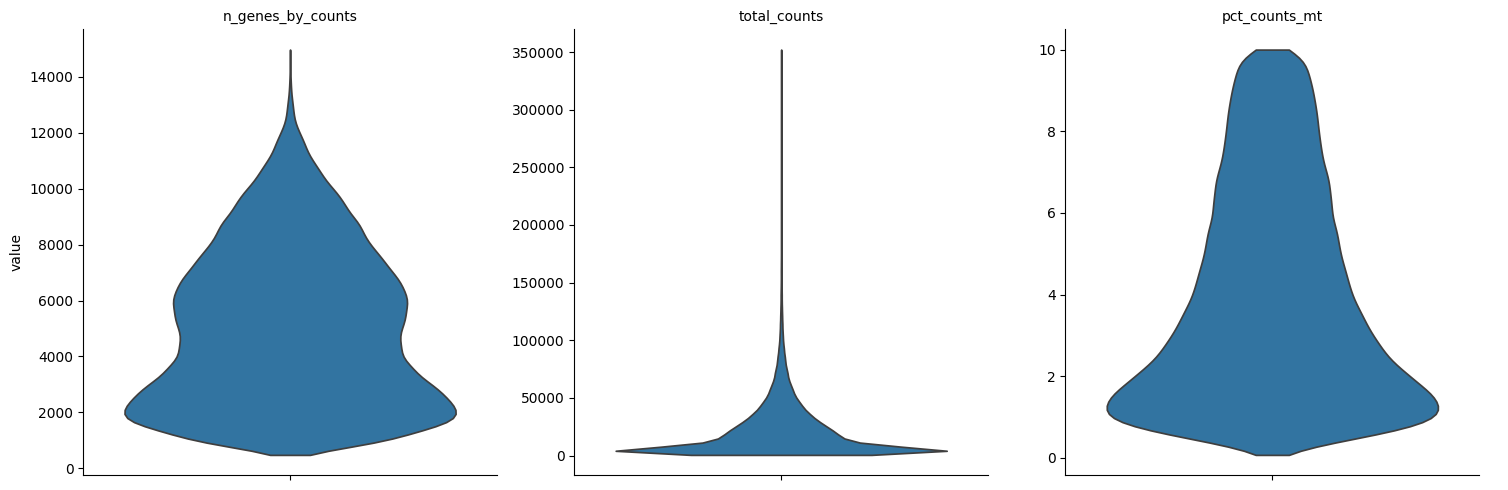

In [8]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    stripplot=False,
    multi_panel=True,
)

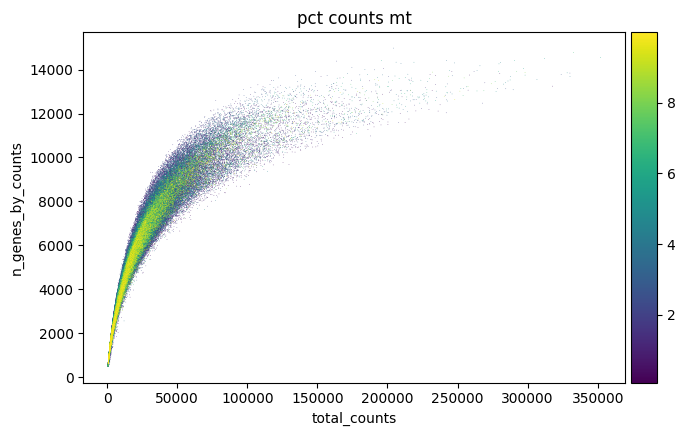

In [9]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [10]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [11]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [12]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

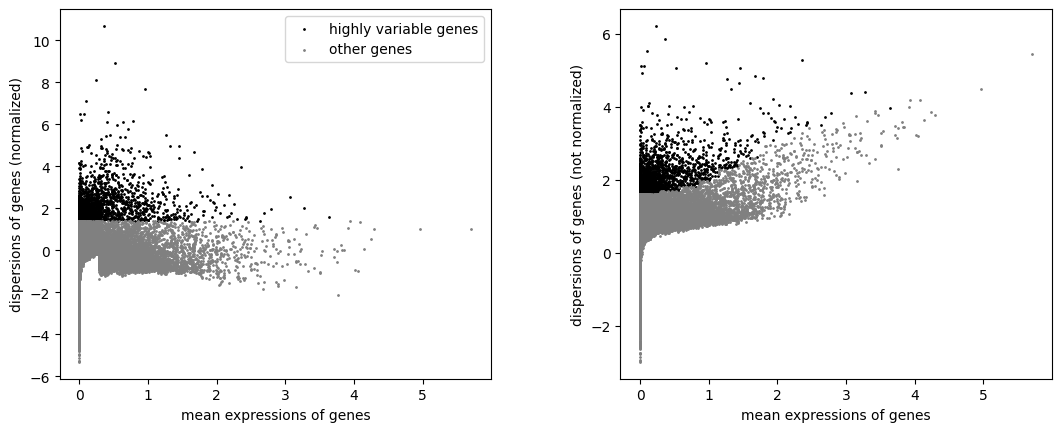

In [13]:
sc.pl.highly_variable_genes(adata)

In [14]:
sc.tl.pca(adata, n_comps=15)  # Reduce to 15 PCs

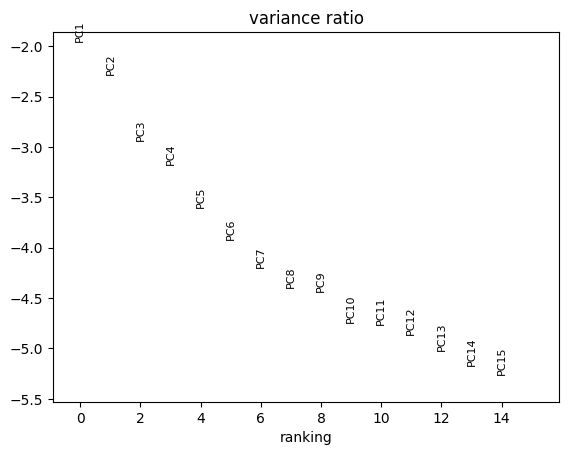

In [15]:
sc.pl.pca_variance_ratio(adata, n_pcs=15, log=True)

In [16]:
sc.pp.neighbors(adata)


In [17]:
sc.tl.umap(adata)

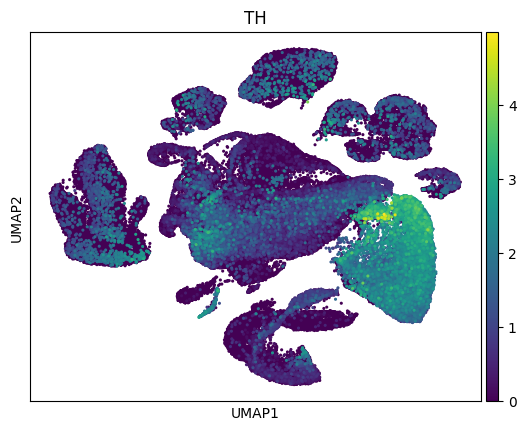

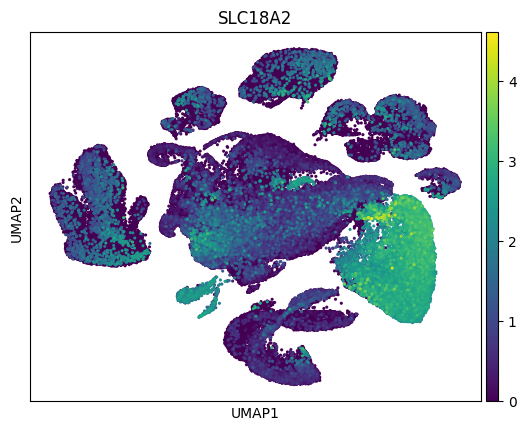

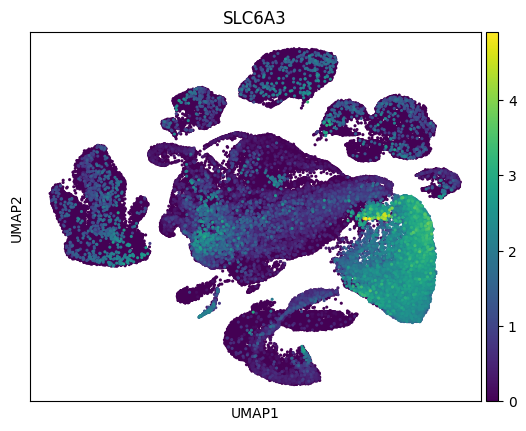

In [18]:
sc.pl.umap(adata, color="TH", cmap="viridis", size=20)
sc.pl.umap(adata, color="SLC18A2", cmap="viridis", size=20)
sc.pl.umap(adata, color="SLC6A3", cmap="viridis", size=20)

In [19]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution = 0.1)

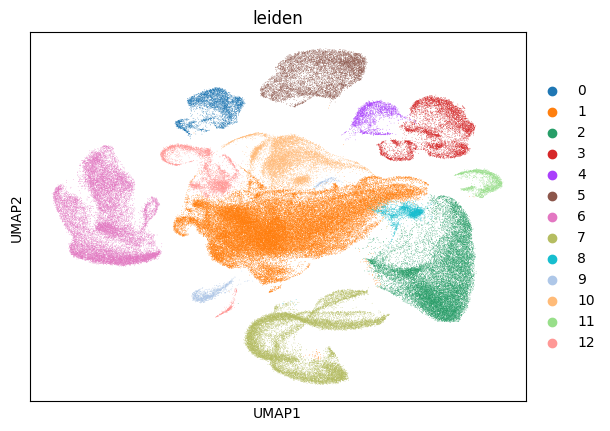

In [20]:
sc.pl.umap(adata, color=["leiden"])

In [21]:
adata.obs['leiden'].value_counts()

,count
leiden,
1,54383
2,19453
6,18750
7,16535
10,8823
5,7784
3,6949
12,4535
0,4136


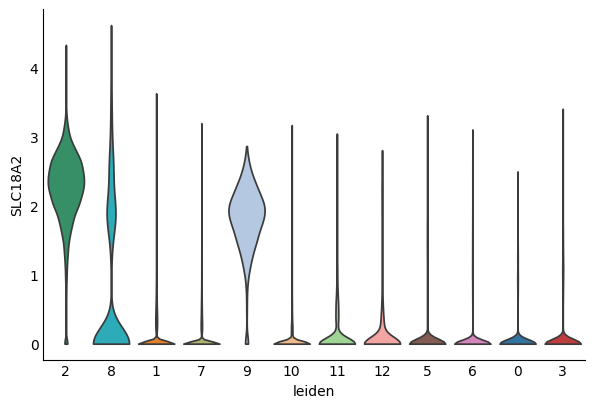

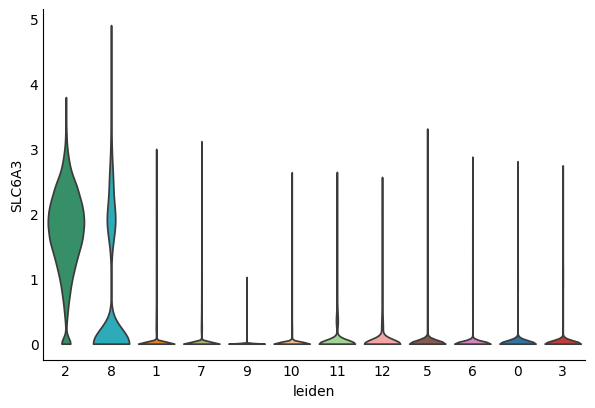

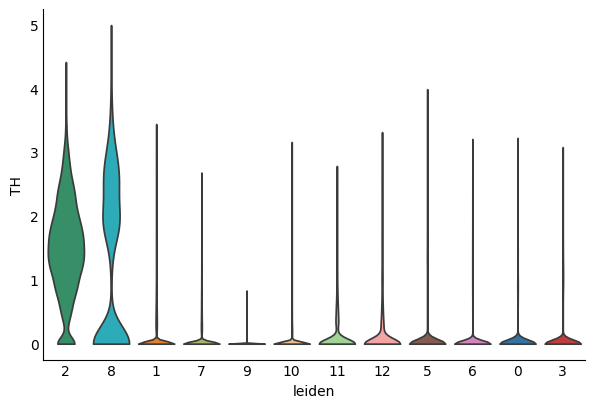

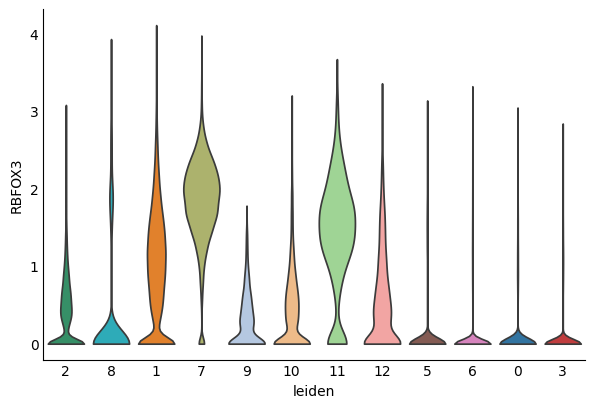

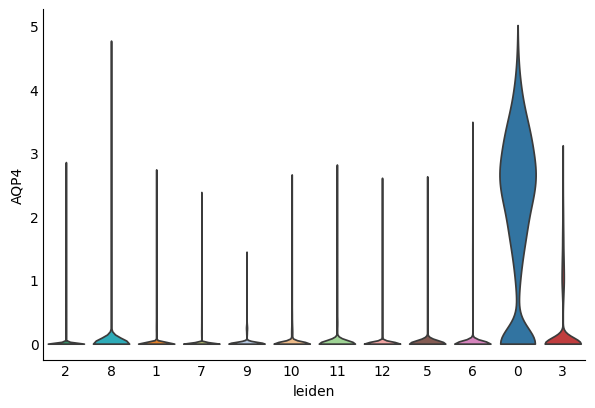

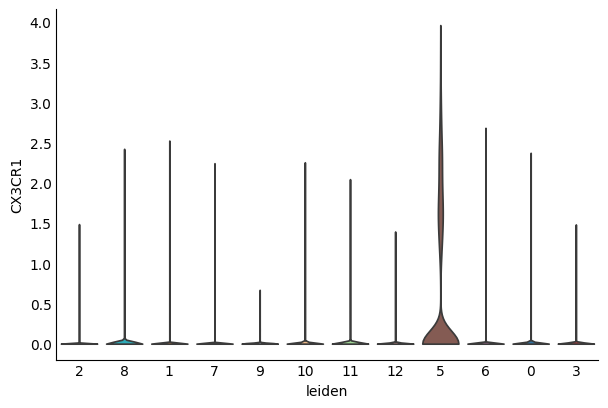

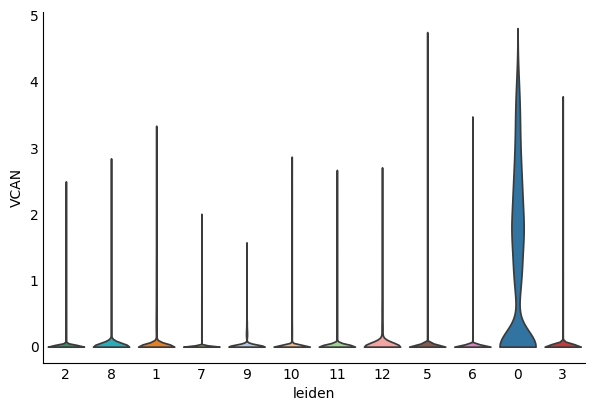

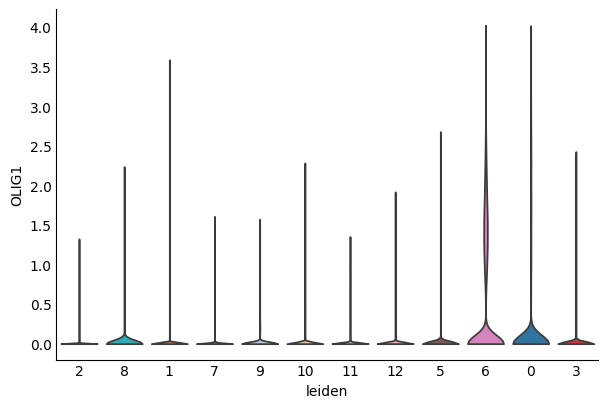

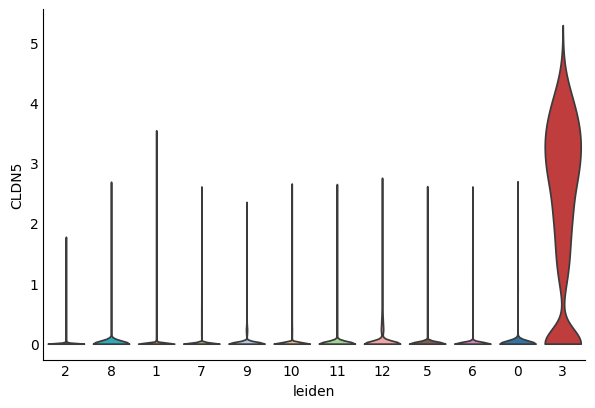

In [22]:
import matplotlib.pyplot as plt
import scanpy as sc

# List of marker genes (replace with your genes of interest)
marker_genes = ["SLC18A2", "SLC6A3", "TH", "RBFOX3","AQP4", "CX3CR1", "VCAN", "OLIG1", "CLDN5"]

groupby_order = ['2', '8', '1','7','9','10','11','12','5','6','0','3']

# Create individual violin plots for each gene
for i, gene in enumerate(marker_genes):
    # Create the plot for the current gene and store the axes object
    ax = sc.pl.violin(adata,
                      keys=gene,                    # Gene of interest
                      groupby="leiden",              # Grouping by clusters
                      stripplot=False,               # Disable stripplot (no points)
                      jitter=0.4,                    # Adjust jitter for stripplot
                      size=10,                       # Adjust plot size (reduce size to halve the height)
                      order=groupby_order,           # Sets the order of the clusters
                      show=False)                    # Avoid immediate display

    # Remove the top and right spines (bounding box lines)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Optionally, remove ticks from the top and right side
    ax.tick_params(axis='both', which='both', length=0)  # Remove ticks from top and right


In [25]:
# Modify the cluster labels
adata.obs["merged_clusters"] = adata.obs["leiden"].astype(str)  # Ensure string type
adata.obs["merged_clusters"].replace({"2": "2_8", "8": "2_8"}, inplace=True)

# Verify the merge
print(adata.obs["merged_clusters"].unique())

['0' '3' '4' '5' '6' '1' '2_8' '10' '7' '11' '12' '9']


<ipython-input-25-16cd86464f23>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adata.obs["merged_clusters"].replace({"2": "2_8", "8": "2_8"}, inplace=True)


In [26]:
dopamine_subset = adata[adata.obs["merged_clusters"] == "2_8"].copy()


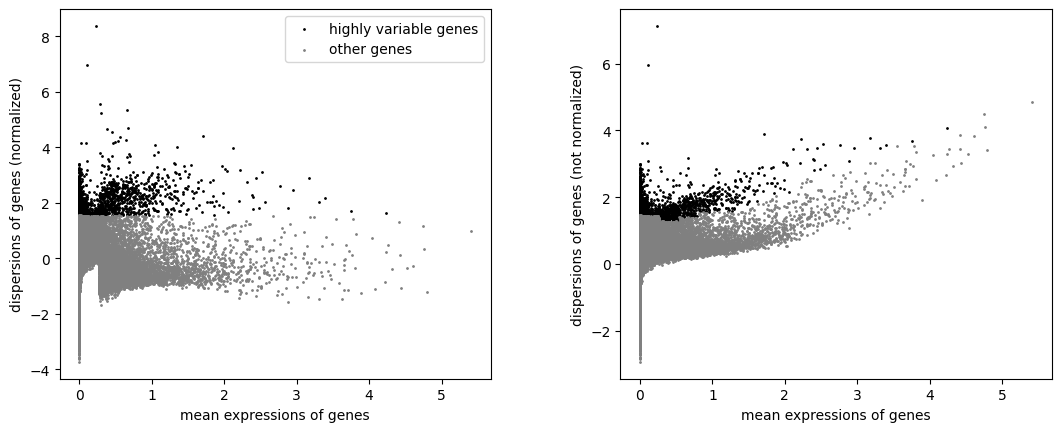

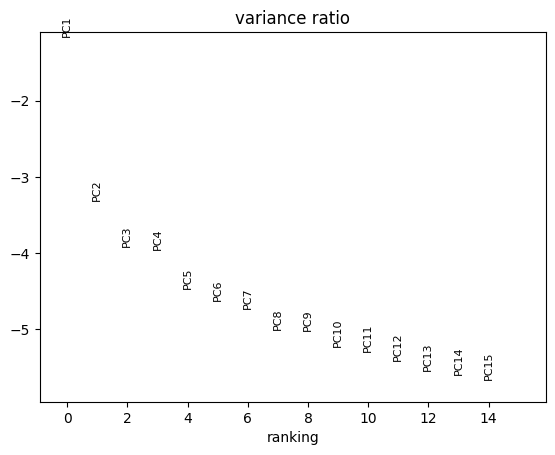

In [27]:
sc.pp.highly_variable_genes(dopamine_subset, n_top_genes=2000)
sc.pl.highly_variable_genes(dopamine_subset)
sc.tl.pca(dopamine_subset, n_comps=15)  # Reduce to 15 PCs
sc.pl.pca_variance_ratio(dopamine_subset, n_pcs=15, log=True)
sc.pp.neighbors(dopamine_subset)
sc.tl.umap(dopamine_subset)

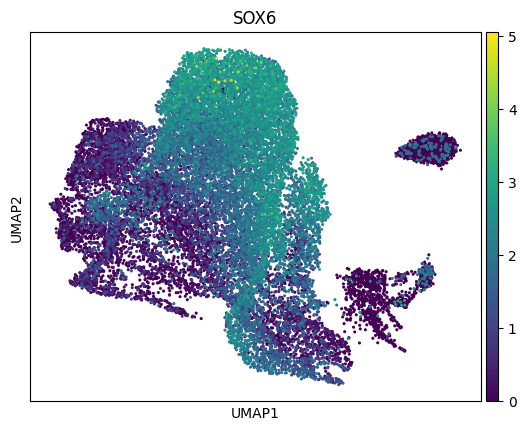

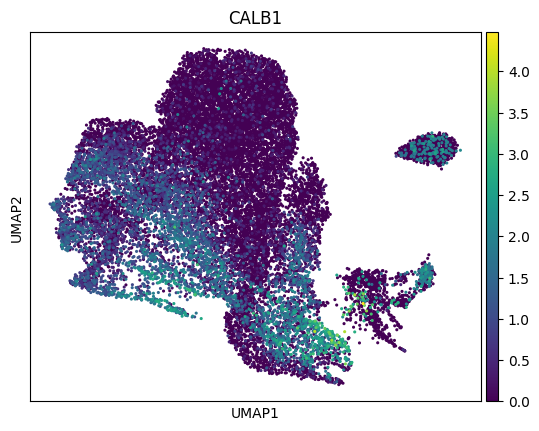

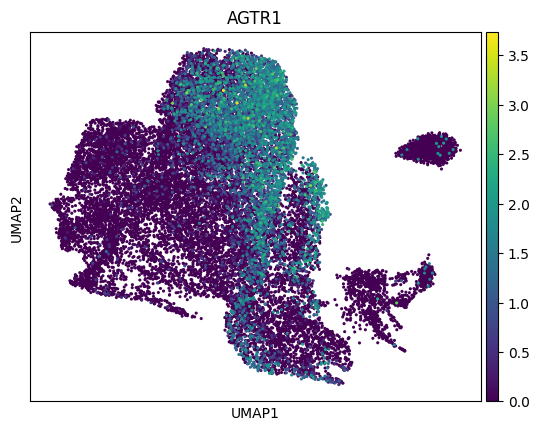

In [30]:
sc.pl.umap(dopamine_subset, color="SOX6", cmap="viridis", size=20)
sc.pl.umap(dopamine_subset, color="CALB1", cmap="viridis", size=20)
sc.pl.umap(dopamine_subset, color="AGTR1", cmap="viridis", size=20)

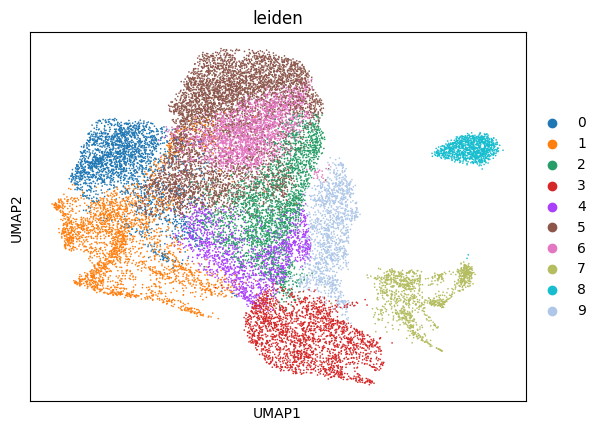

In [33]:
sc.tl.leiden(dopamine_subset, flavor="igraph", n_iterations=2, resolution = 0.3)
sc.pl.umap(dopamine_subset, color=["leiden"])

<ipython-input-46-cf2045ab0b4b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression = dopamine_subset.to_df()[gene].groupby(dopamine_subset.obs[groupby]).mean()


Sorted cluster order: ['5', '6', '9', '2', '4', '3', '1', '0', '8', '7']


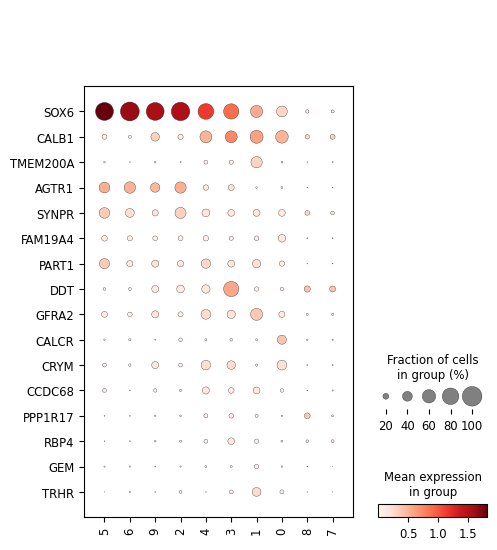

In [46]:
gene = "SOX6"  # Replace with your gene of interest
groupby = "leiden"  # Your clustering column

# Compute mean expression of the gene per cluster
mean_expression = dopamine_subset.to_df()[gene].groupby(dopamine_subset.obs[groupby]).mean()

# Sort clusters based on the expression of the gene
sorted_clusters = mean_expression.sort_values(ascending=False).index.tolist()
print("Sorted cluster order:", sorted_clusters)


# List of genes to visualize
genes = ["SOX6", "CALB1", "TMEM200A", "AGTR1", "SYNPR", "FAM19A4", "PART1", "DDT", "GFRA2", "CALCR", "CRYM", "CCDC68", "PPP1R17", "RBP4", "GEM", "TRHR"]  # Replace with your genes of interest

# Create the dot plot
sc.pl.dotplot(dopamine_subset, var_names=genes, swap_axes = True, groupby=groupby, categories_order=sorted_clusters)

In [50]:
import pickle

os.chdir("/content/drive/MyDrive/HODD/")

with open("dopamine_subset.pkl", "wb") as f:
    pickle.dump(dopamine_subset, f)